In [2]:
import numpy as np
import pandas as pd
import seaborn as sns


In [21]:
df=pd.read_csv("Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [17]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [28]:
df['Request timestamp']=df['Request timestamp'].apply(lambda x:pd.to_datetime(x))
df['Drop timestamp']=df['Drop timestamp'].apply(lambda x:pd.to_datetime(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [29]:
df["Request hour"] = df["Request timestamp"].dt.hour
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [33]:
df['req_day']=df["Request timestamp"].dt.day
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,req_dat,req_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,7
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,7
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,7
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,13


In [38]:
df.drop("req_dat",axis=1,inplace=true)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,req_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


In [40]:
def time_period(x):
  if x<5:
    return "Early Morning"
  elif 5<=x<10:
    return "Morning Rush"
  elif 10<=x<17:
    return "Day Time"
  elif 17<=x<22:
    return "Evening Rush"
  else:
    return "Night Rush"
df['time_slot'] =df["Request hour"].apply(lambda x:time_period(x))

In [41]:
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,req_day,time_slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,Day Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Evening Rush
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Morning Rush
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Evening Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning Rush


In [42]:
df.time_slot.value_counts()

Evening Rush     2342
Morning Rush     2103
Day Time         1224
Early Morning     578
Night Rush        498
Name: time_slot, dtype: int64

<Axes: xlabel='time_slot', ylabel='count'>

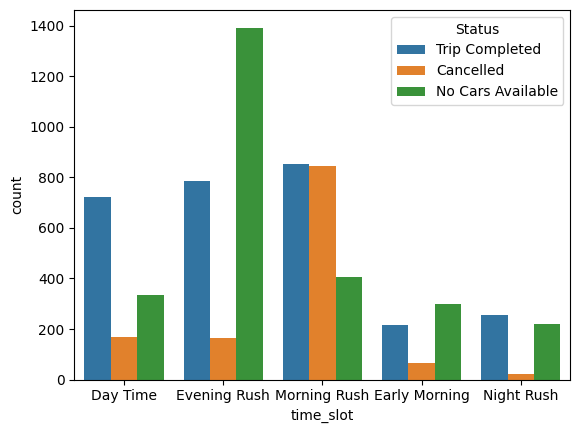

In [45]:
sns.countplot(data=df,x="time_slot",hue="Status")

<Axes: xlabel='Pickup point', ylabel='count'>

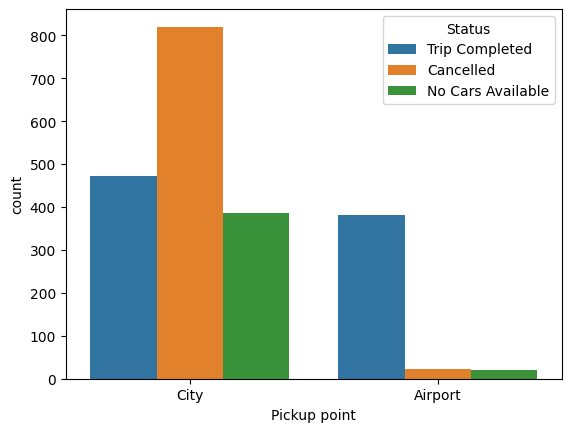

In [46]:
df_mrng_rush=df[df.time_slot=="Morning Rush"]
sns.countplot(data=df_mrng_rush,x="Pickup point",hue="Status")

In [50]:
df_airport_cancelled=df_mrng_rush.loc[(df_mrng_rush["Pickup point"]=="Airport")&(df_mrng_rush["Status"]=="Cancelled")]
len(df_airport_cancelled)

23

In [53]:
df_airport_completed=df_mrng_rush.loc[(df_mrng_rush["Pickup point"]=="Airport")&(df_mrng_rush["Status"]=="Trip Completed")]
len(df_airport_completed)

382

In [62]:
df_airport_notavailable=df_mrng_rush.loc[(df_mrng_rush["Pickup point"]=="Airport")&(df_mrng_rush["Status"]=="No Cars Available")]
len(df_airport_notavailable)

21

In [51]:
df_city_cancelled=df_mrng_rush.loc[(df_mrng_rush["Pickup point"]=="City")&(df_mrng_rush["Status"]=="Cancelled")]
len(df_city_cancelled)

820

In [54]:
df_city_completed=df_mrng_rush.loc[(df_mrng_rush["Pickup point"]=="City")&(df_mrng_rush["Status"]=="Trip Completed")]
len(df_city_completed)

472

In [64]:
df_city_notavailable=df_mrng_rush.loc[(df_mrng_rush["Pickup point"]=="City")&(df_mrng_rush["Status"]=="No Cars Available")]
len(df_city_notavailable)

385

<Axes: xlabel='Pickup point', ylabel='count'>

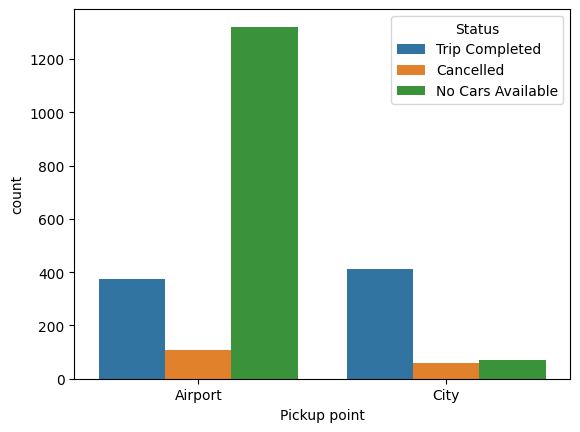

In [48]:
df_evng_rush=df[df.time_slot=="Evening Rush"]
sns.countplot(data=df_evng_rush,x="Pickup point",hue="Status")

In [56]:
df_airport_cancelled=df_evng_rush.loc[(df_evng_rush["Pickup point"]=="Airport")&(df_evng_rush["Status"]=="Cancelled")]
len(df_airport_cancelled)

106

In [57]:
df_airport_completed=df_evng_rush.loc[(df_evng_rush["Pickup point"]=="Airport")&(df_evng_rush["Status"]=="Trip Completed")]
len(df_airport_completed)

373

In [58]:
df_airport_notavailable=df_evng_rush.loc[(df_evng_rush["Pickup point"]=="Airport")&(df_evng_rush["Status"]=="No Cars Available")]
len(df_airport_notavailable)

1321

In [65]:
df_city_cancelled=df_evng_rush.loc[(df_evng_rush["Pickup point"]=="City")&(df_evng_rush["Status"]=="Cancelled")]
len(df_city_cancelled)

60

In [67]:
df_city_completed=df_evng_rush.loc[(df_evng_rush["Pickup point"]=="City")&(df_evng_rush["Status"]=="Trip Completed")]
len(df_city_completed)

411

In [68]:
df_city_notavailable=df_evng_rush.loc[(df_evng_rush["Pickup point"]=="City")&(df_evng_rush["Status"]=="No Cars Available")]
len(df_city_notavailable)

71